## Neural Networks

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [7]:
def splitDate(df):
    X_date = []
    for d in df.index:
        d = str(d).split(' ')[0]
        x = []
        x.append(int(d.split('-')[0]))
        x.append(int(d.split('-')[1]))
        x.append(int(d.split('-')[2]))
        X_date.append(x)
    
    X_date = np.array(X_date,dtype=np.int64) 
    return [X_date[:,:1],X_date[:,1:2],X_date[:,2:3]]

In [8]:
#Function to read data from csv file and create a dataframe
def getDataSplitInTrainTest(fname,ftrends):
    #Read into dataframe
    df = pd.read_csv(fname,index_col='Date',
                     parse_dates=True,na_values=['nan'])
    
       
    
    df['Date'] = pd.to_datetime(df.index).astype(np.int64)
    df['Year'],df['Month'],df['Day'] = splitDate(df)
    
    df_trends = pd.read_csv(ftrends,index_col='Date',parse_dates=True)
        
    #Stat and End Date for train and test data respectivly
    #Train Data
    train_start_date = '2007-01-01'
    train_end_date = '2016-12-30'
    train_dates = pd.date_range(train_start_date,train_end_date)
    
    #Test Data
    test_start_date = '2016-12-15'    
    test_end_date = '2016-12-30'
    test_dates = pd.date_range(test_start_date,test_end_date)
    
    #Our dataframe wil have date as index and one column as open price
    df_train = pd.DataFrame(index=train_dates) 
    df_test = pd.DataFrame(index=test_dates) 

    #Join
    df_train = df_train.join(df)
    df_test = df_test.join(df)
    
    #drop nan
    df_train = df_train.dropna()
    df_test = df_test.dropna()
    
    #For trends value
    df_train1 = df_train.join(df_trends).dropna()
    df_test1 = df_test.join(df_trends).dropna()
    
    #Return df_train and df_train as a tuple
    return (df_train1,df_test1)
    
#Calling function to get processed data
df_train,df_test = getDataSplitInTrainTest('AAPL.csv','TRENDS.csv')

In [9]:
#Train
#X_train = np.asarray([pd.to_datetime(df_train.index).astype(np.int64),df_train['Trend']])
X_train = df_train[['Year','Month','Day']]
y_train = df_train[['Open']]

#test
#X_test = np.array([pd.to_datetime(df_test.index).astype(np.int64),df_test['Trend']])
X_test = df_test[['Year','Month','Day']]
y_test = df_test[['Open']]


from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train)
y_test = y_scaler.transform(y_test)
#y_train = y_train.reshape(y_train.shape[0],)
#y_test = y_test.reshape(y_test.shape[0],)

In [10]:
def plotDataframe(df,title):
    ax = df.plot(title=title,fontsize=10,ylim=(110,130))
    ax.set_xlabel("Data")
    ax.set_ylabel("Price")
    plt.show()   

## Algorithm

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [12]:
model1 = Sequential()
model1.add(Dense(100,activation='relu',input_dim=X_train.shape[1]))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(50,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam',loss='mse')
model1.fit(X_train,
           y_train,
           epochs=500,
           batch_size=25)

Epoch 1/500
2491/2491 [==============================] - 0s - loss: 0.2471     
Epoch 2/500
2491/2491 [==============================] - 0s - loss: 0.0895     
Epoch 3/500
2491/2491 [==============================] - 0s - loss: 0.0798     
Epoch 4/500
2491/2491 [==============================] - 0s - loss: 0.0685     
Epoch 5/500
2491/2491 [==============================] - 0s - loss: 0.0508     
Epoch 6/500
2491/2491 [==============================] - 0s - loss: 0.0283     
Epoch 7/500
2491/2491 [==============================] - 0s - loss: 0.0196     
Epoch 8/500
2491/2491 [==============================] - 0s - loss: 0.0139     
Epoch 9/500
2491/2491 [==============================] - 0s - loss: 0.0138     
Epoch 10/500
2491/2491 [==============================] - 0s - loss: 0.0125     
Epoch 11/500
2491/2491 [==============================] - 0s - loss: 0.0103     
Epoch 12/500
2491/2491 [==============================] - 0s - loss: 0.0089     
Epoch 13/500
2491/2491 [=============

2491/2491 [==============================] - 0s - loss: 0.0023     
Epoch 103/500
2491/2491 [==============================] - 0s - loss: 0.0030     
Epoch 104/500
2491/2491 [==============================] - 0s - loss: 0.0091     
Epoch 105/500
2491/2491 [==============================] - 0s - loss: 0.0093     
Epoch 106/500
2491/2491 [==============================] - 0s - loss: 0.0035     
Epoch 107/500
2491/2491 [==============================] - 0s - loss: 0.0026     
Epoch 108/500
2491/2491 [==============================] - 0s - loss: 0.0023     
Epoch 109/500
2491/2491 [==============================] - 0s - loss: 0.0025     
Epoch 110/500
2491/2491 [==============================] - 0s - loss: 0.0025     
Epoch 111/500
2491/2491 [==============================] - 0s - loss: 0.0021     
Epoch 112/500
2491/2491 [==============================] - 0s - loss: 0.0020     
Epoch 113/500
2491/2491 [==============================] - 0s - loss: 0.0021     
Epoch 114/500
2491/2491 [=====

2491/2491 [==============================] - 0s - loss: 0.0014     
Epoch 203/500
2491/2491 [==============================] - 0s - loss: 0.0013     
Epoch 204/500
2491/2491 [==============================] - 0s - loss: 0.0016     
Epoch 205/500
2491/2491 [==============================] - 0s - loss: 0.0021     
Epoch 206/500
2491/2491 [==============================] - 0s - loss: 0.0020     
Epoch 207/500
2491/2491 [==============================] - 0s - loss: 0.0013     
Epoch 208/500
2491/2491 [==============================] - 0s - loss: 0.0018     
Epoch 209/500
2491/2491 [==============================] - 0s - loss: 0.0014     
Epoch 210/500
2491/2491 [==============================] - 0s - loss: 0.0013     
Epoch 211/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 212/500
2491/2491 [==============================] - 0s - loss: 0.0017     
Epoch 213/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 214/500
2491/2491 [=====

2491/2491 [==============================] - 0s - loss: 0.0012      
Epoch 303/500
2491/2491 [==============================] - 0s - loss: 0.0013     
Epoch 304/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 305/500
2491/2491 [==============================] - 0s - loss: 0.0017     
Epoch 306/500
2491/2491 [==============================] - 0s - loss: 0.0073     
Epoch 307/500
2491/2491 [==============================] - 0s - loss: 0.0071     
Epoch 308/500
2491/2491 [==============================] - 0s - loss: 0.0028     
Epoch 309/500
2491/2491 [==============================] - 0s - loss: 0.0020     
Epoch 310/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 311/500
2491/2491 [==============================] - 0s - loss: 0.0012     
Epoch 312/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 313/500
2491/2491 [==============================] - 0s - loss: 0.0012     
Epoch 314/500
2491/2491 [====

2491/2491 [==============================] - 0s - loss: 9.3345e-04     
Epoch 401/500
2491/2491 [==============================] - 0s - loss: 8.9285e-04     
Epoch 402/500
2491/2491 [==============================] - 0s - loss: 0.0010       
Epoch 403/500
2491/2491 [==============================] - 0s - loss: 9.0959e-04     
Epoch 404/500
2491/2491 [==============================] - 0s - loss: 8.5636e-04     
Epoch 405/500
2491/2491 [==============================] - 0s - loss: 0.0013     
Epoch 406/500
2491/2491 [==============================] - 0s - loss: 0.0012     
Epoch 407/500
2491/2491 [==============================] - 0s - loss: 0.0012      
Epoch 408/500
2491/2491 [==============================] - 0s - loss: 0.0035       
Epoch 409/500
2491/2491 [==============================] - 0s - loss: 0.0041     
Epoch 410/500
2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 411/500
2491/2491 [==============================] - 0s - loss: 0.0012     
Epoch 412

2491/2491 [==============================] - 0s - loss: 0.0015     
Epoch 497/500
2491/2491 [==============================] - 0s - loss: 0.0010         
Epoch 498/500
2491/2491 [==============================] - 0s - loss: 8.3956e-04     
Epoch 499/500
2491/2491 [==============================] - 0s - loss: 9.3055e-04     
Epoch 500/500
2491/2491 [==============================] - 0s - loss: 0.0010      


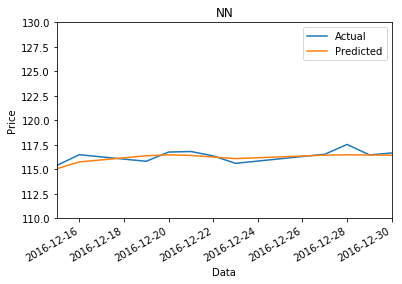

In [14]:
df_rf = pd.DataFrame(index=df_test.index)
df_rf['Actual'] = y_scaler.inverse_transform(y_test)
df_rf['Predicted'] =y_scaler.inverse_transform(model1.predict(X_test))
plotDataframe(df_rf,"NN")

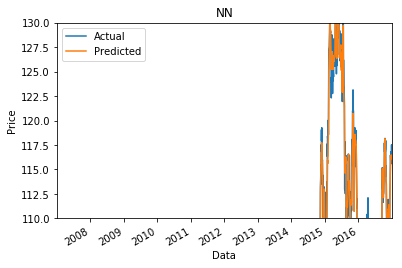

In [15]:
df_rf = pd.DataFrame(index=df_train.index)
df_rf['Actual'] = y_scaler.inverse_transform(y_train)
df_rf['Predicted'] =y_scaler.inverse_transform(model1.predict(X_train))
plotDataframe(df_rf,"NN")

In [16]:
model1.evaluate(X_test,y_test,batch_size=1)

246/270 [==========================>...] - ETA: 0s

0.67689538222233148